In [231]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings 
import seaborn as sns
warnings.filterwarnings('ignore')

In [232]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [233]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [234]:
data.drop("Id",axis=1,inplace=True)

In [235]:
X=data.drop(columns='Species')
y=data['Species']

In [236]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=45)

In [238]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=40)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=40)

In [239]:
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)

In [240]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

1.0 0.9666666666666667


In [241]:
path=classifier.cost_complexity_pruning_path(X_train,y_train)
alphas=path['ccp_alphas']
alphas

array([0.        , 0.00795455, 0.00810185, 0.01484848, 0.27334362,
       0.32948045])

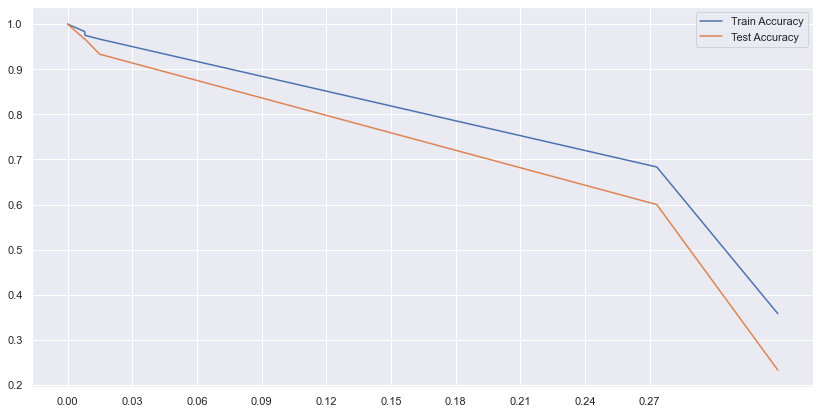

In [242]:
accuracy_train,accuracy_test=[],[]
for i in alphas:
    tree=DecisionTreeClassifier(ccp_alpha=i)
    tree.fit(X_train,y_train)
    y_train_pred=tree.predict(X_train)
    y_test_pred=tree.predict(X_test)
    accuracy_train.append(accuracy_score(y_train,y_train_pred))
    accuracy_test.append(accuracy_score(y_test,y_test_pred))
sns.set()
plt.figure(figsize=(14,7))
sns.lineplot(y=accuracy_train,x=alphas,label="Train Accuracy")
sns.lineplot(y=accuracy_test,x=alphas,label="Test Accuracy")
plt.xticks(ticks=np.arange(0.00,0.3,0.03))
plt.show()

In [243]:
tree = DecisionTreeClassifier(ccp_alpha=0.02, random_state=40)
tree.fit(X_train,y_train)
y_train_pred=tree.predict(X_train)
y_test_pred=tree.predict(X_test)
print(accuracy_score(y_train,y_train_pred),accuracy_score(y_test,y_test_pred))

0.9666666666666667 0.9333333333333333
